# Extracting channels

This uses the Channel template to find channel network pixels by highlighting high-curvature parts of the landscape.

It is available as a Jupyter notebook ([link](https://github.com/rmsare/scarplet/blob/master/docs/source/examples/channels.ipynb)) in the repository. Sample data is provided in the [data folder](https://github.com/rmsare/scarplet/blob/master/docs/source/examples/data/).

## Channel extraction in geomorphology

Wavelet analysis has been used to identify channels and rough landscape elements since the early days of high-resolution topographic data (e.g., [Lashermes, et al., 2007](https://doi.org/10.1029/2007GL031140)). More recently, other approaches have become popular for extracting channel heads specifically. These include GeoNet, which uses nonlinear filtering and a multi-scale analysis of DEM curvature ([Passalacqua, et al., 2010](https://doi.org/10.1029/2009WR008812)) and DrEICH, which identifies channel heads based on a fluvial-hillslope process transition encoded in elevation-flow length profiles ([Clubb, et al., 2014](https://doi.org/10.1002/2013WR015167)).

This example uses a Ricker wavelet similar to those used in earlier work to estimate channel or valley depth and orientation. Unlike the radially symmetric wavelets Lashermes, et al., 2007 or other approaches, this is a windowed version of that function that is linear in one direction.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scarplet as sl
from scarplet.datasets import load_grandcanyon
from scarplet.WindowedTemplate import Scarp, Channel

This sample data is an SRTM tile including part the Grand Canyon.

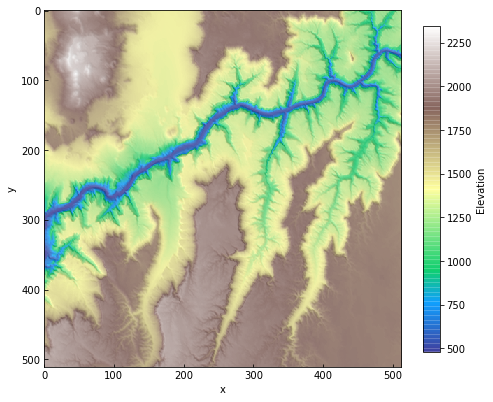

In [3]:
data = load_grandcanyon()
data.plot(color=True, figsize=(8,8))

SRTM data is coarse -- and in this case, we are working with ~76 m resolution (this is a tile at Web Mercator zoom level 10). The range of resolvable curvature will be very low. We can change this to work pixel units instead.

In [4]:
data._georef_info.dx = 1.
data._georef_info.dy = -1.

In [5]:
params = {'scale': 10.,
          'age': 0.1,
          'ang_min': -np.pi / 2,
          'ang_max': np.pi / 2
         }

res = sl.match(data, Channel, **params)

In this case, using the Ricker wavelet, negative amplitudes correspond to ridges and other convexities. Let's discard pixels with low amplitudes to see the main channels in the network.

In [7]:
mask = res[0] < 10.
res[:, mask] = np.nan

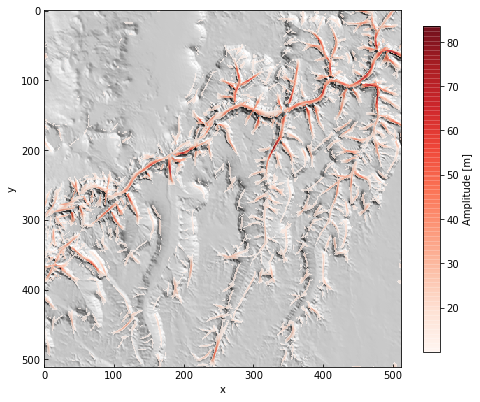

In [13]:
data = sl.datasets.load_grandcanyon()
data.plot(color=False, figsize=(8, 8))
ax = plt.gca()
im = ax.imshow(res[0], alpha=0.75, cmap='Reds')
cb = plt.colorbar(im, ax=ax, shrink=0.75, label='Amplitude [m]')

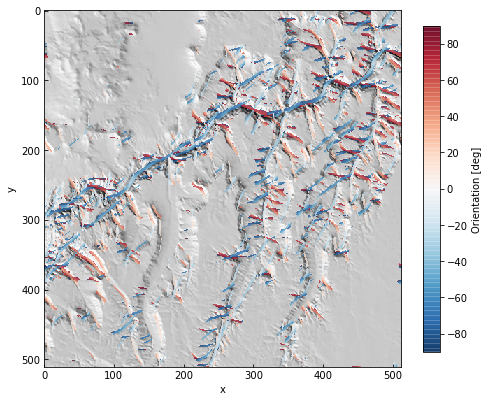

In [14]:
data.plot(color=False, figsize=(8, 8))
ax = plt.gca()
angle = res[2] * 180. / np. pi
im = ax.imshow(angle, alpha=0.75, cmap='RdBu_r')
cb = plt.colorbar(im, ax=ax, shrink=0.75, label='Orientation [deg]')

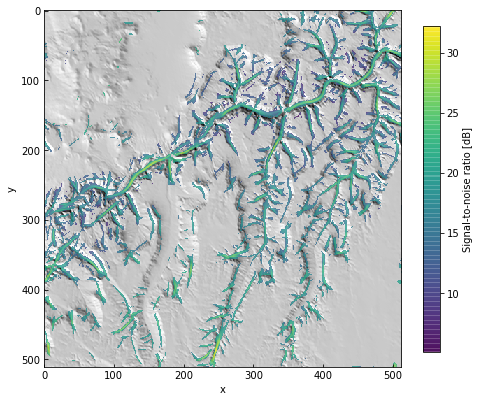

In [15]:
data.plot(color=False, figsize=(8, 8))
ax = plt.gca()
im = ax.imshow(10 * np.log10(res[3]), alpha=0.75, cmap='viridis')
cb = plt.colorbar(im, ax=ax, shrink=0.75, label='Signal-to-noise ratio [dB]')